# 와인 원산지 분류하기

13가지의 화학 성분 분석을 통해서 3군데의 경작지 중 어디에서 생상된 와인인지를 알아내는 분류 문제입니다

# 단축키
- 실행 : 특수키 + Enter
- 이동 : 화살표 위아래
- 명령모드(파란색 ESC) /수정모드(초록색 Enter)
- 셀지우기 : X
- 셀만들기 : B (below) 아래쪽에 셀 생성
- 마크다운셀(M, 123456)/코드셀(Y)

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [ ]:
#tab 자동완성, shift+tab 함수설명,  ? 함수 설명 탭 
df = pd.read_csv('./datasets/wine.data', header=None)
df.shape

데이터 기본 분석
- shape 형태
- info():누락, 데이터 타입(.dtypes)
- describe() : 통계치 (수치)
- isna().sum().sum() : 누락 갯수 세기    > dropna() 누락행 버리기
- 전체
    - corr() 상관관계
    - plotting.scatter_matrix 상관관계 그래프
    - hist() 히스토그램
    - plot() : 값의 단위가 달라서 보통 그래프가 잘 안보입니다
    - boxplot() : 분포 한눈에 확인 
- 개별적
    - 수치형 : plot(), hist()
    - 카테고리 : value_counts() >  pie(), bar(), barh()
- 카테고리별로 분석
    - groupby(컬럼).aggregate(['mean', 'max'])
- 컬럼 2개의 관계
    - scatter() 산점도 X, Y 
- 카테고리 원핫 인코딩
- X, Y 분리
  - 학습용/ 테스트(검증)용 분리
- score 성능측정
- 어떤 특징이 중요한가(계수가 크냐 작냐)
  - 중요도 순으로 정렬, 값의 크기 확인

df.head()

df[0].unique(), set(df[0]) #중복되지 않는 값 확인 > 원산지가 확실하다

In [ ]:
# 컬럼 이름 바꾸기
col = ['Y', 'Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols', 
'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue', 
'OD280/OD315 of diluted wines','Proline']
short_col = ['Y', 'Alcohol','Malic','Ash','Alcalinity','Magnesium',' phenols', 
'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue', 
'diluted','Proline']
len(df.columns), len(col)

In [ ]:
df.columns = short_col
df.head()

In [ ]:
df.describe() #타입, 통계

In [ ]:
#누락 확인
df.isna().sum().sum()

In [ ]:
#상관관계
df.corr()

In [ ]:
a = pd.plotting.scatter_matrix(df, figsize=(20,20))
#대각 : 히스토그램
#컬럼 간의 산점도(scatter)

In [ ]:
#df.drop(columns=['Ash', 'Malic']).plot() #값의 스케일이 서로 달라서 그래프 표현이 잘 안됩니다
df['Ash'].plot()

In [ ]:
df.boxplot() # 이상치가 있는지를 확인합니다

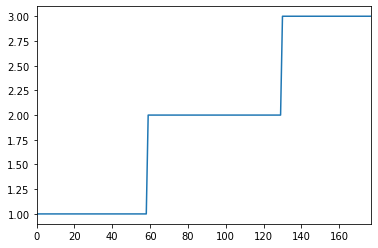

In [43]:
df['Y'].plot() # 1,2,3 이 사실은 수치가 아니고 원산지 카테고리입니다.

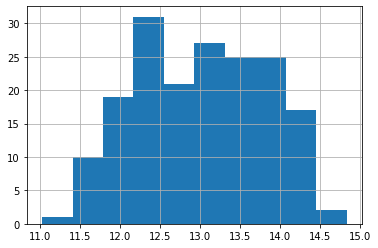

In [45]:
df['Alcohol'].hist()

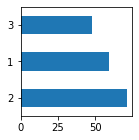

In [53]:
#카테고리 타입에 대해서
df['Y'].value_counts().plot.barh(figsize=(2,2)) #bar, barh

In [60]:
#카테고리 그룹 별로 분석
#df.groupby(by='Y').mean()
df.groupby(by='Y').aggregate('mean')
#df.groupby(by='Y').aggregate(['mean', 'max'])
#예: (남녀별 / 국가별).mean()   (영화제작사별 / 장르)[평점].mean()
#df.groupby(by=['Y' ,'Ash'] ).aggregate(['mean', 'max'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted,Proline
Y,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


 분류 모델 머신러닝 알고리즘을 선택해서 학습시키고 성능 측정
- (실수값을) 예측:  예: 내일의 온도     : Regression
- (카테고리를) 분류 :  예: 이 와인의 원산지가 A,B,C 중 어디냐 : Classification

In [62]:
from sklearn.linear_model import LogisticRegression

In [65]:
X = df.drop(columns='Y')
Y = df['Y']

In [67]:
model = LogisticRegression().fit(X,Y) #피팅 = 학습
model.score(X,Y) # 분류 정확도(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9719101123595506

# KNN - K 최근접 이웃 모델
분류와 예측에 사용할 수 있는 모델로 입력데이터와 가장 값이 가까운 k 개의 샘플을 찾아서 그 샘플들의 평균으로 목표를 예측합니다

알콜 도수로 와인 원산지를 예측하겠다

In [71]:
x = df['Alcohol']
y = df['Y']

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# 입력데이터 X 는 2차원이어야 합니다 (데이터갯수, 특징수) 
# 출력데이터 Y 는 1차원, 2차원 모두 가능합니다 
x_2d = np.array(x).reshape(-1, 1)
model = KNeighborsClassifier(n_neighbors=1).fit(x_2d,y)
model.score(x_2d, y) #분류 정확도

0.8876404494382022

In [90]:
# X 는 (6, 1) 
model.predict([[15],[14],[13],[12],[11],[10]]) # 알콜 11도의 원산지는 ? 

array([1, 1, 2, 2, 2, 2], dtype=int64)

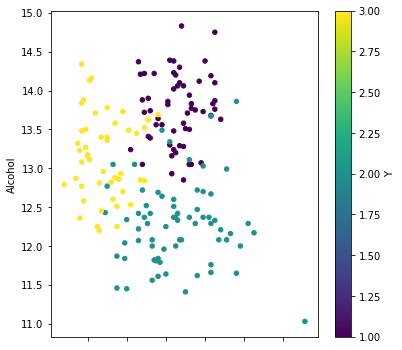

In [145]:
df.plot.scatter(x='Hue', y='Alcohol', c='Y', colormap='viridis', figsize=(6,6))

In [143]:
X = df[['Hue','Alcohol']] # Hue = X[0]= x0, 알콜 = X[1] = x1
Y = df['Y']
model = KNeighborsClassifier(5).fit(X,Y)
model.score(X,Y)

0.9325842696629213

In [144]:
test = [[0.5, 14], [1.5, 12], [0.9, 14], [0.9, 15]]
model.predict(test)

array([3, 2, 1, 1], dtype=int64)

In [131]:
X.mean()

Hue         0.957449
Alcohol    13.000618
dtype: float64